##### Implementing Logistic regression using ROC

In [1]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples = 1000,
                            n_features = 5,
                            n_classes = 2,
                            random_state= 42)
                        

In [2]:
#Implementing train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42)

In [3]:
#Creating a dummy model that gives 0 as output for target values

dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [4]:
#Implementing the model
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()

regression.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
#Predict the probability for test data to come as 0 or 1
model_prob = regression.predict_proba(X_test)
model_prob = model_prob[:,1]

In [ ]:
#Calculating roc auc score
from sklearn.metrics import roc_auc_score

score_dummy = roc_auc_score(y_test,dummy_model_prob)
score_model = roc_auc_score(y_test,model_prob)

print(score_dummy)
print(score_model)

#roc auc score tells how well the model seperates the classes across the threshold
# 1 or near to 1 - perfect classification
# 0.5 - random guess (no discrimination)
# < 0.5 - worse

0.5
0.9560131649172745


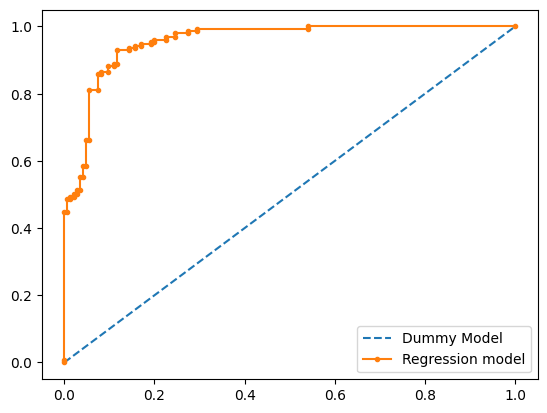

In [15]:
#Plotting the roc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
dummy_model_fpr,dummy_model_tpr,_ = roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,threshold = roc_curve(y_test,model_prob)

plt.plot(dummy_model_fpr,dummy_model_tpr,linestyle = '--',label = 'Dummy Model')
plt.plot(model_fpr,model_tpr,marker = '.',label = 'Regression model')
plt.legend()
plt.show()


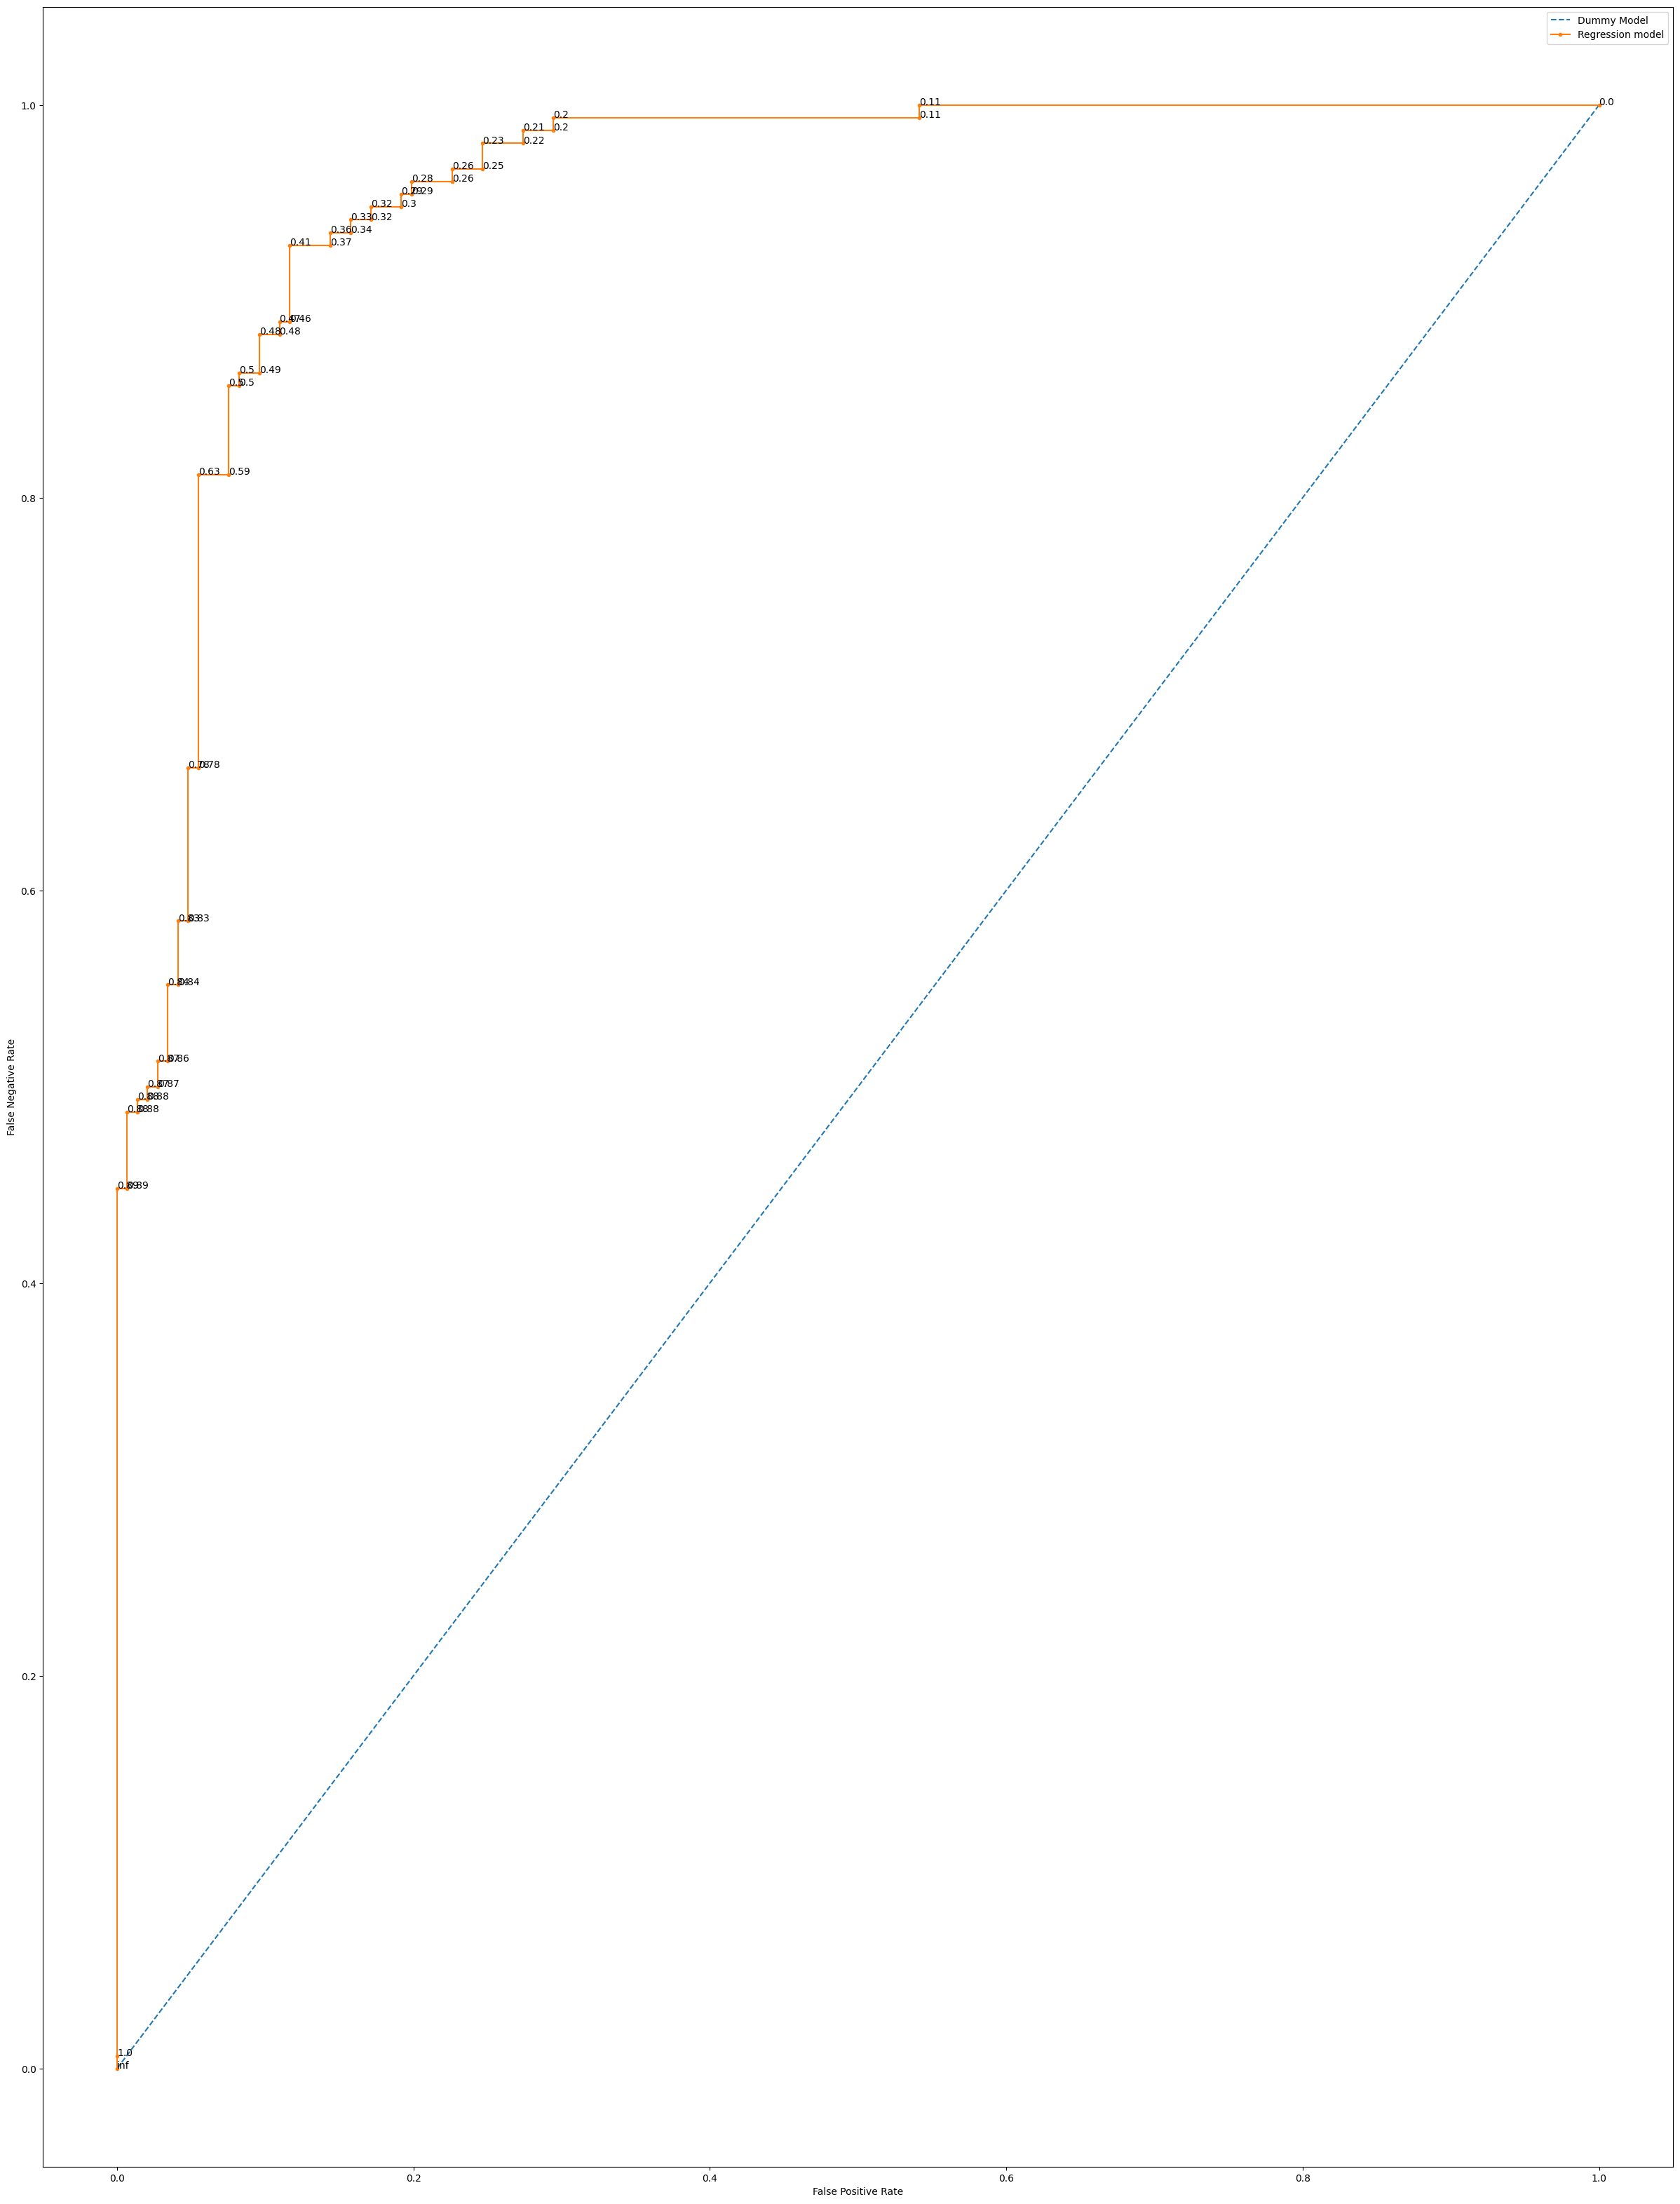

In [22]:

import numpy as np
fig = plt.figure(figsize=(30,40))
ax = fig.add_subplot(111)
ax.plot(dummy_model_fpr,dummy_model_tpr,linestyle = '--',label = 'Dummy Model')
ax.plot(model_fpr,model_tpr,marker = '.',label = 'Regression model')

for xyz in zip(model_fpr,model_tpr,threshold):
    ax.annotate(f"{np.round(xyz[2],2)}",xy = (xyz[0],xyz[1]))

plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
ax.legend()
plt.show()